This project is to identify Enron employees who may have committed fraud based on the public Enron financial and email dataset. The machine learning algorithms are suitable to detect implicit patterns in a large amount of data without explicit methodology. With given the data on which the fraud is marked, we have to classify unknown fraud from the data. This corresponds to the supervised machine learning.

### Task 1: Select what features you'll use.

In [2]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

There are 146 data points with 21 features. The data consists of integers and string.

In [102]:
import pandas as pd
%matplotlib inline

data_df = pd.DataFrame.from_dict(data_dict, orient='index')
data_df.shape

(146, 21)

In [103]:
data_df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955,2902,2869717,4484442,NaN,4175000,phillip.allen@enron.com,-126027,-3081055,1729541,...,47,1729541,2195,152,65,False,304805,1407,126027,NaN
BADUM JAMES P,NaN,NaN,178980,182466,NaN,NaN,NaN,NaN,NaN,257817,...,NaN,257817,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,NaN,NaN,james.bannantine@enron.com,-560222,-5104,5243487,...,39,4046157,29,864523,0,False,NaN,465,1757552,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,frank.bay@enron.com,-82782,-201641,63014,...,NaN,NaN,NaN,69,NaN,False,NaN,NaN,145796,NaN


The string 'NaN' values are replaced with NumPy NaN for the sake of convenience.

In [105]:
import numpy as np
data_df = data_df.replace('NaN', np.nan)
data_df.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,9.500000e+01,86.000000,3.900000e+01,1.250000e+02,4.000000e+00,8.200000e+01,1.800000e+01,4.900000e+01,1.260000e+02,9.500000e+01,86.000000,1.020000e+02,86.000000,9.300000e+01,86.000000,6.600000e+01,86.000000,1.100000e+02,1.700000e+01
mean,5.621943e+05,2073.860465,1.642674e+06,5.081526e+06,4.196250e+07,2.374235e+06,1.664106e+05,-1.140475e+06,6.773957e+06,1.087289e+05,64.895349,5.987054e+06,608.790698,9.190650e+05,41.232558,1.470361e+06,1176.465116,2.321741e+06,1.668049e+05
std,2.716369e+06,2582.700981,5.161930e+06,2.906172e+07,4.708321e+07,1.071333e+07,4.201494e+06,4.025406e+06,3.895777e+07,5.335348e+05,86.979244,3.106201e+07,1841.033949,4.589253e+06,100.073111,5.942759e+06,1178.317641,1.251828e+07,3.198914e+05
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,4.000000e+05,7.000000e+04,-7.576788e+06,-2.799289e+07,-4.409300e+04,1.480000e+02,0.000000,3.285000e+03,12.000000,2.000000e+00,0.000000,6.922300e+04,2.000000,-2.604490e+06,3.285000e+03
25%,2.118160e+05,541.250000,8.157300e+04,3.944750e+05,1.600000e+06,4.312500e+05,-3.896218e+05,-6.948620e+05,4.945102e+05,2.261400e+04,10.000000,5.278862e+05,22.750000,1.215000e+03,1.000000,2.812500e+05,249.750000,2.540180e+05,9.878400e+04
50%,2.599960e+05,1211.000000,2.274490e+05,1.101393e+06,4.176250e+07,7.693750e+05,-1.469750e+05,-1.597920e+05,1.102872e+06,4.695000e+04,35.000000,1.310814e+06,41.000000,5.238200e+04,8.000000,4.420350e+05,740.500000,4.517400e+05,1.085790e+05
75%,3.121170e+05,2634.750000,1.002672e+06,2.093263e+06,8.212500e+07,1.200000e+06,-7.500975e+04,-3.834600e+04,2.949847e+06,7.995250e+04,72.250000,2.547724e+06,145.500000,3.620960e+05,24.750000,9.386720e+05,1888.250000,1.002370e+06,1.137840e+05
max,2.670423e+07,15149.000000,3.208340e+07,3.098866e+08,8.392500e+07,9.734362e+07,1.545629e+07,-8.330000e+02,4.345095e+08,5.235198e+06,528.000000,3.117640e+08,14368.000000,4.266759e+07,609.000000,4.852193e+07,5521.000000,1.303223e+08,1.398517e+06


All data points have at least one 'NaN' in their features. Also, all features, except 'poi', have at least one 'NaN' through their data points. The lack of value may cause bad effect on the result. As a rule of thumb, I'll use features with at least 100 non-NA values for finalcial data.

In [7]:
data_df.count()

salary                        95
to_messages                   86
deferral_payments             39
total_payments               125
loan_advances                  4
bonus                         82
email_address                111
restricted_stock_deferred     18
deferred_income               49
total_stock_value            126
expenses                      95
from_poi_to_this_person       86
exercised_stock_options      102
from_messages                 86
other                         93
from_this_person_to_poi       86
poi                          146
long_term_incentive           66
shared_receipt_with_poi       86
restricted_stock             110
director_fees                 17
dtype: int64

In [88]:
financial_features_list = ['total_payments','total_stock_value',
                           'exercised_stock_options','restricted_stock']

If the data points are insufficient or need another feature, try to add up normalized financial features.

There are 18 POIs in the dataset. The dataset is skewed, and accuracy may not be the correct metric.

In [11]:
len(data_df[data_df['poi']==1])

18

### Task 2: Remove outliers

The maximum values of financial features are two orders of magnitude greater than most of the other value.

In [101]:
data_df[financial_features_list].describe()

,total_payments,total_stock_value,exercised_stock_options,restricted_stock
count,1.250000e+02,1.260000e+02,1.020000e+02,1.100000e+02
mean,5.081526e+06,6.773957e+06,5.987054e+06,2.321741e+06
std,2.906172e+07,3.895777e+07,3.106201e+07,1.251828e+07
min,1.480000e+02,-4.409300e+04,3.285000e+03,-2.604490e+06
25%,3.944750e+05,4.945102e+05,5.278862e+05,2.540180e+05
50%,1.101393e+06,1.102872e+06,1.310814e+06,4.517400e+05
75%,2.093263e+06,2.949847e+06,2.547724e+06,1.002370e+06
max,3.098866e+08,4.345095e+08,3.117640e+08,1.303223e+08


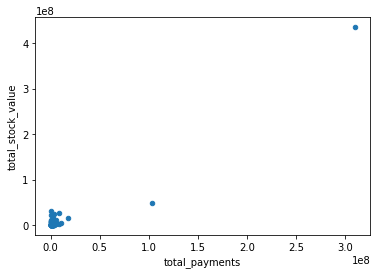

In [14]:
data_df.plot.scatter(x='total_payments', y='total_stock_value')

The data point turns out 'TOTAL,' so that should be removed.

In [15]:
data_df[data_df['total_payments'] > 1e8]

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,kenneth.lay@enron.com,NaN,-300000.0,49110078.0,...,123.0,34348384.0,36.0,10359729.0,16.0,True,3600000.0,2411.0,14761694.0,NaN
TOTAL,26704229.0,NaN,32083396.0,309886585.0,83925000.0,97343619.0,NaN,-7576788.0,-27992891.0,434509511.0,...,NaN,311764000.0,NaN,42667589.0,NaN,False,48521928.0,NaN,130322299.0,1398517.0


In [106]:
data_df = data_df.drop('TOTAL')

### Task 3: Create new feature(s)

Though the higher value of 'from_poi_to_this_person' and 'from_this_person_to_poi' indicates the data point is POI, it may be originated from the fact that he/she treated many emails. So the message ratio related to the POI, rather than the absolute number of the message, will be a more adequate feature.

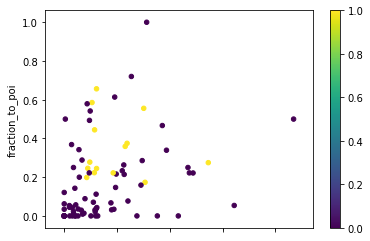

In [113]:
data_df['fraction_from_poi'] = (data_df['from_poi_to_this_person']) / data_df['to_messages']
data_df['fraction_to_poi'] = data_df['from_this_person_to_poi'] / data_df['from_messages']
data_df.plot.scatter(x='fraction_from_poi', y='fraction_to_poi',
                     c=data_df['poi'].replace(True,1).replace(False,0),
                     colormap='viridis')

In [109]:
### Store to my_dataset for easy export below.
my_dataset = data_df.replace(np.nan, 'NaN').to_dict('index')

features_list = ['poi', 'salary', 'total_payments', 'total_stock_value', 'exercised_stock_options', 
                 'restricted_stock', 'fraction_from_poi', 'fraction_to_poi']

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers

Because the data points are small and skewed, it is better to use [Stratified ShuffleSplit cross-validator](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) which returns stratified randomized folds with the percentage of samples for each class.

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits = 1000, random_state = 42)
for train_idx, test_idx in cv.split(features, labels):
    features_train = []
    features_test  = []
    labels_train   = []
    labels_test    = []
    for ii in train_idx:
        features_train.append(features[ii])
        labels_train.append(labels[ii])
    for jj in test_idx:
        features_test.append(features[jj])
        labels_test.append(labels[jj])

I'll try the tree supervised classifiers. They are [Gaussian Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), [C-Support Vector Classification](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), and [decision tree classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). The first trial of [C-Support Vector Classification](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) with default parameters produces zero score for precision and accuracy. However, it may be possible to get a better result by tuning the parameters.

In [115]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()
pipe = make_pipeline(MinMaxScaler(), PCA(n_components=5), GaussianNB(), memory=cachedir)
pipe.fit(features_train, labels_train)
labels_pred = pipe.predict(features_test)
print("accuracy:", pipe.score(features_test, labels_test))
print("precision:", precision_score(labels_test, labels_pred))
print("recall:", recall_score(labels_test, labels_pred))
print("f1:", f1_score(labels_test, labels_pred))
rmtree(cachedir)

accuracy: 0.8
precision: 0.3333333333333333
recall: 0.5
f1: 0.4


In [90]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()
pipe = make_pipeline(SVC(), memory=cachedir)
pipe.fit(features_train, labels_train)
labels_pred = pipe.predict(features_test)
print("accuracy:", pipe.score(features_test, labels_test))
print("precision:", precision_score(labels_test, labels_pred))
print("recall:", recall_score(labels_test, labels_pred))
print("f1:", f1_score(labels_test, labels_pred))
rmtree(cachedir)

accuracy: 0.8666666666666667
precision: 0.0
recall: 0.0
f1: 0.0


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [91]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()
pipe = make_pipeline(DecisionTreeClassifier(), memory=cachedir)
pipe.fit(features_train, labels_train)
labels_pred = pipe.predict(features_test)
print("accuracy:", pipe.score(features_test, labels_test))
print("precision:", precision_score(labels_test, labels_pred))
print("recall:", recall_score(labels_test, labels_pred))
print("f1:", f1_score(labels_test, labels_pred))
rmtree(cachedir)

accuracy: 0.8666666666666667
precision: 0.5
recall: 0.5
f1: 0.5


In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()
pipe = make_pipeline(MinMaxScaler(), PCA(n_components=7), KNeighborsClassifier(), memory=cachedir)
pipe.fit(features_train, labels_train)
labels_pred = pipe.predict(features_test)
print("accuracy:", pipe.score(features_test, labels_test))
print("precision:", precision_score(labels_test, labels_pred))
print("recall:", recall_score(labels_test, labels_pred))
print("f1:", f1_score(labels_test, labels_pred))
rmtree(cachedir)

accuracy: 0.8666666666666667
precision: 0.0
recall: 0.0
f1: 0.0


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()
pipe = make_pipeline(MinMaxScaler(), PCA(n_components=7), AdaBoostClassifier(), memory=cachedir)
pipe.fit(features_train, labels_train)
labels_pred = pipe.predict(features_test)
print("accuracy:", pipe.score(features_test, labels_test))
print("precision:", precision_score(labels_test, labels_pred))
print("recall:", recall_score(labels_test, labels_pred))
print("f1:", f1_score(labels_test, labels_pred))
rmtree(cachedir)

accuracy: 0.9333333333333333
precision: 1.0
recall: 0.5
f1: 0.6666666666666666


In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()
pipe = make_pipeline(MinMaxScaler(), PCA(n_components=7), RandomForestClassifier(), memory=cachedir)
pipe.fit(features_train, labels_train)
labels_pred = pipe.predict(features_test)
print("accuracy:", pipe.score(features_test, labels_test))
print("precision:", precision_score(labels_test, labels_pred))
print("recall:", recall_score(labels_test, labels_pred))
print("f1:", f1_score(labels_test, labels_pred))
rmtree(cachedir)

accuracy: 0.8666666666666667
precision: 0.0
recall: 0.0
f1: 0.0


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Task 5: Tune your classifier

[GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) does not have any parameter to adjust. However, we can enhance the result by normalization. Also, reducing the dimension helps to prevent overfitting of the classifier. 

In [117]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()
pipe = make_pipeline(MinMaxScaler(), PCA(), GaussianNB(), memory=cachedir)
tuned_parameters = [{'pca__n_components': [2, 3, 4, 5, 6, 7]}]
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(pipe, tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(features_train, labels_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    labels_true, labels_pred = labels_test, clf.predict(features_test)
    print(classification_report(labels_true, labels_pred))
    print()
    
rmtree(cachedir)

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'pca__n_components': 5}

Grid scores on development set:

0.672 (+/-0.490) for {'pca__n_components': 2}
0.670 (+/-0.492) for {'pca__n_components': 3}
0.621 (+/-0.398) for {'pca__n_components': 4}
0.679 (+/-0.484) for {'pca__n_components': 5}
0.625 (+/-0.397) for {'pca__n_components': 6}
0.628 (+/-0.291) for {'pca__n_components': 7}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.92      0.85      0.88        13
        1.0       0.33      0.50      0.40         2

avg / total       0.84      0.80      0.82        15


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'pca__n_components': 7}

Grid scores on development set:

0.584 (+/-0.227) for {'pca__n_components': 2}
0.575 (+/-0.246) for {'pca__n_comp

The minimum sampling limit helps to prevent overfitting of the decision tree.

In [116]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()
pipe = make_pipeline(PCA(), DecisionTreeClassifier(), memory=cachedir)
tuned_parameters = [{'pca__n_components': [2,3,4,5,7],
                    'decisiontreeclassifier__min_samples_split': [2,4,6,8,10]
                    }]
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(pipe, tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(features_train, labels_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    labels_true, labels_pred = labels_test, clf.predict(features_test)
    print(classification_report(labels_true, labels_pred))
    print()

# Tuning hyper-parameters for precision



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classificatio

Best parameters set found on development set:

{'decisiontreeclassifier__min_samples_split': 6, 'pca__n_components': 7}

Grid scores on development set:

0.495 (+/-0.176) for {'decisiontreeclassifier__min_samples_split': 2, 'pca__n_components': 2}
0.533 (+/-0.210) for {'decisiontreeclassifier__min_samples_split': 2, 'pca__n_components': 3}
0.478 (+/-0.120) for {'decisiontreeclassifier__min_samples_split': 2, 'pca__n_components': 4}
0.545 (+/-0.212) for {'decisiontreeclassifier__min_samples_split': 2, 'pca__n_components': 5}
0.607 (+/-0.337) for {'decisiontreeclassifier__min_samples_split': 2, 'pca__n_components': 7}
0.524 (+/-0.165) for {'decisiontreeclassifier__min_samples_split': 4, 'pca__n_components': 2}
0.550 (+/-0.214) for {'decisiontreeclassifier__min_samples_split': 4, 'pca__n_components': 3}
0.522 (+/-0.145) for {'decisiontreeclassifier__min_samples_split': 4, 'pca__n_components': 4}
0.559 (+/-0.210) for {'decisiontreeclassifier__min_samples_split': 4, 'pca__n_components': 5}


### Task 6: Dump your classifier, dataset, and features_list

The [Gaussian Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) and [decision tree classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) show a good performance at the same level. Tuning strategy of these algorithms for the Enron data is to prevent the overfitting. For the [Gaussian Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), reduction of the feature dimensionality works well. For the [decision tree classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), the minimum splitting limit helps to fit well. The best case of both models shows 0.5 for precision and recall. When I tested the algorithm using [tester.py](https://github.com/udacity/ud120-projects/blob/master/final_project/tester.py), the decision tree classifier gives higher scores more often. Therefore my pick of the algorithm is the decision tree classifier.

In [114]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = make_pipeline(PCA(n_components=7), DecisionTreeClassifier(min_samples_split=4))
clf.fit(features_train, labels_train)
labels_pred = clf.predict(features_test)
print("accuracy:", accuracy_score(labels_test, labels_pred))
print("precision:", precision_score(labels_test, labels_pred))
print("recall:", recall_score(labels_test, labels_pred))
print("f1:", f1_score(labels_test, labels_pred))

accuracy: 0.8666666666666667
precision: 0.5
recall: 0.5
f1: 0.5


In [71]:
dump_classifier_and_data(clf, my_dataset, features_list)